# CLUSTERING

- Partional based: memaksa  data yg jauh untuk ikut ke dalam klaster (untuk ikut ke centroid terdekat meskipun itu outlier)
- Density: bisa mendeteksi outlier dalam suatu data, tidak memaksa data yg jauh (outlier) untuk masuk ke dalam klaster
- Hierarchical: ada tingkatan di tiap klaster nya

## K-Means

- Convergence: ketika suatu errror atau suatu solusi dikatakan konvergen ketika sudah tidak ada perubahan lagi (grafik sudah stabil).
- Kelemahan k-means: inisiasi centroid yang dilakukan secara random


## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('fivethirtyeight')

## Load Dataset

In [2]:
data = pd.read_csv('/content/Dataset-Praktikum (2).csv')
data

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


## EDA

In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

,0
IDPelanggan,0
Kelamin,0
Usia,0
Pendapatan (juta Rp),0
Rating_pengeluaran (1-100),0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDPelanggan,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
data.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


In [8]:
data.drop(columns='IDPelanggan', inplace=True)

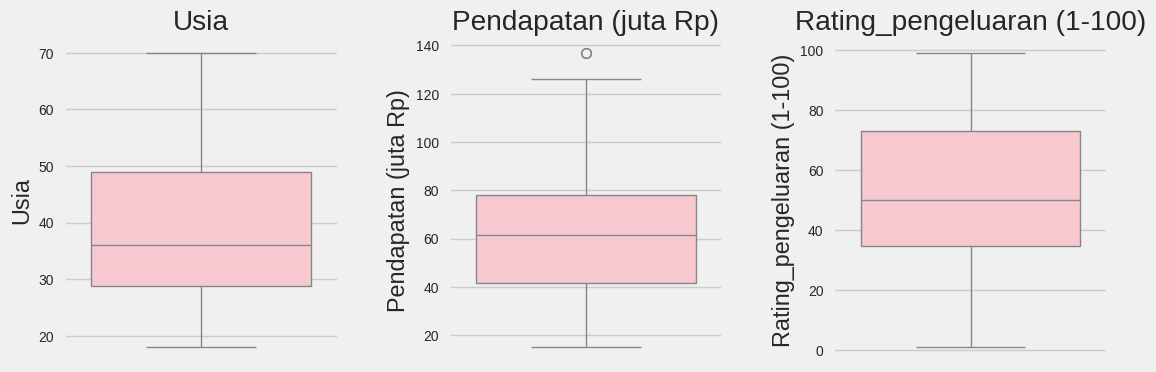

In [9]:
def box_plot(data):
  # Definisikan variabel yang akan divisualisasikan
  variables = data.select_dtypes(exclude = 'object').columns

  # Buat figure dan axes untuk subplot dengan ukuran 1x3
  fig, axes = plt.subplots(1, 3, figsize = (12, 4)) # Sesuaikan ukuran figure
  fig.subplots_adjust(hspace = 0.4, wspace = 0.4) # Atur jarak antar subplot

  # Iterasi melalui setiap variabel dan buat boxplot
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color = "pink", ax=axes[i]) # Perhatikan perubahan di sini
    axes[i].set_title(var) # Tambahkan judul untuk setiap plot

  # Tampilkan plot
  plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])

In [11]:
# Inisiasi
scaler = MinMaxScaler()

# Fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

## Modelling

### K-Means

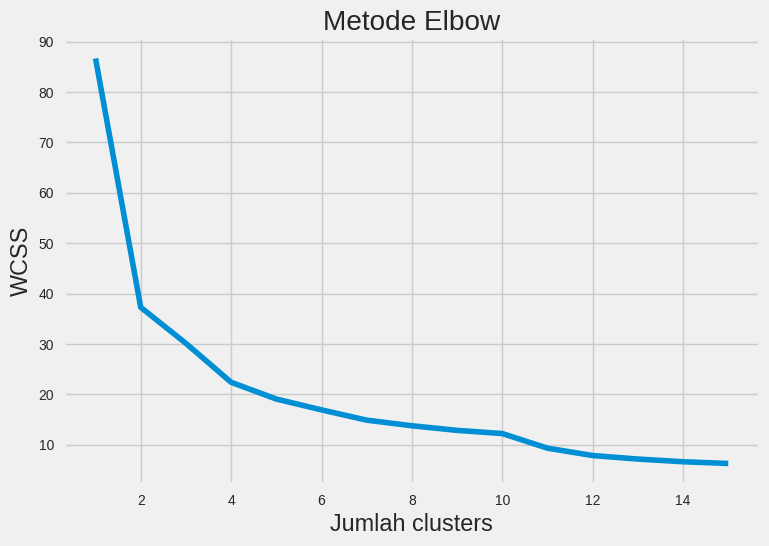

In [12]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

# Plot grafik Elbow

In [13]:
# Menjalankan K-Means Clustering ke Dataset
model1 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

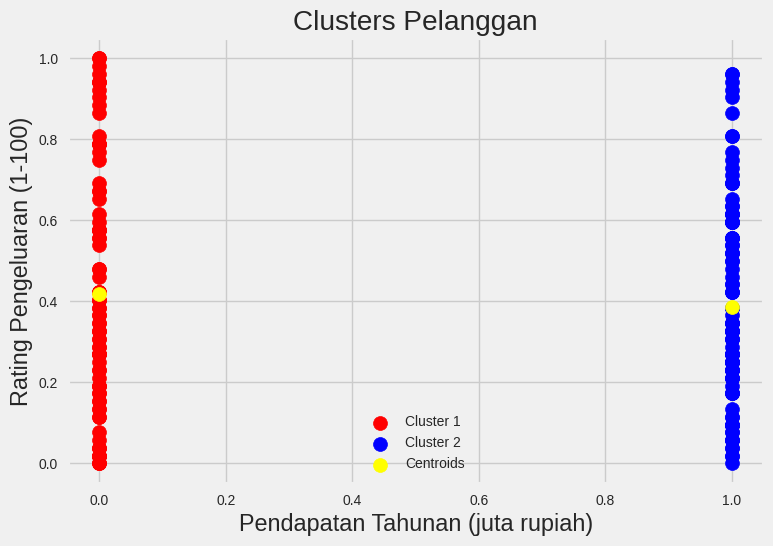

In [14]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters Pelanggan')
plt.xlabel('Pendapatan Tahunan (juta rupiah)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

### DBSCAN

In [17]:
# Membuat objek  DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5) # besar kecilnya lingkaran berdasarkan nilai eps (hyperparameter bisa diubah2)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

cluster yg dapat dibuat dr dbscan hanya 2 , 0 dan 1. tidak ada label -1 berarti tidak ada outlier yg masuk

In [18]:
# Tambahkan label tersebut menjadi kolom baru di dataset
data['Hasil cluster'] = model2.labels_
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


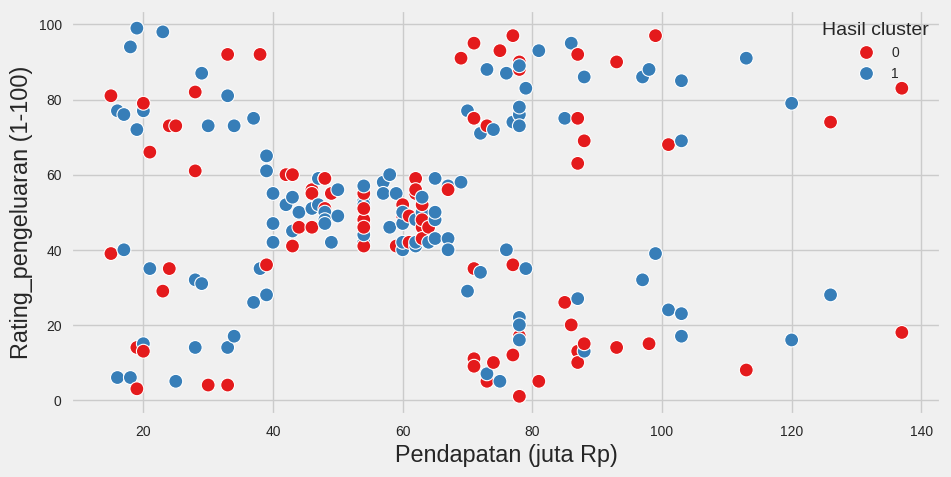

In [22]:
# Visualisasi

plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil cluster', data = data, palette = 'Set1', s=100);

## Metrics Evaluation

### 1. Silhouette Score

In [23]:
# Menghitung Silhouette Score Algoritma K-Means
Evaluasi_Kmeans = silhouette_score(X_scaled, y_pred1)
print('Silhouette Score:', Evaluasi_Kmeans)

Silhouette Score: 0.5194624832665107


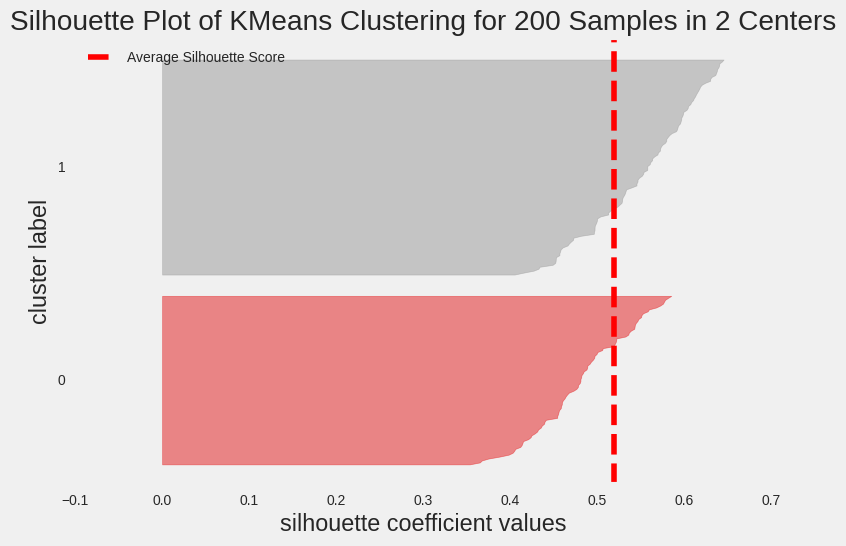

In [24]:
# Membuat Silhouette Visualization untuk Algoritma K-Means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [26]:
# Menghitung Silhouette Score Algoritma DBSCAN
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print('Silhouette Score:', Evaluasi_DBScan)

Silhouette Score: 0.5194624832665107


Silhouette semakin menjauhi 0 semakin bagus (kekompakkan klaster nya)

### Davies-Bouldin Index (DBI)

In [28]:
# Menghitung Davies-Bouldin Index (DBI) Algoritma K-Means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print('Davies-Bouldin Index:', dbi_score1)

Davies-Bouldin Index: 0.8172534497318451


In [29]:
# Menghitung Davies-Bouldin Index (DBI) Algoritma DBSCAN
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print('Davies-Bouldin Index:', dbi_score2)

Davies-Bouldin Index: 0.8172534497318451


DBI semakin mendekati 0 semakin bagus (kekompakkan klaster nya)

Hyperparameter adalah aturan (settingan) yang jika diubah maka bisa mempengaruhi model. memang harus ada di dalam suatu model

Hal yang bisa dilakukan untuk improve model performance? **Hyperparameter Tuning**
- Grid search
- Random search
- Bayesian search
- PS0
- GWO
- etc.